# `snell_example_optimized.ipynb`

In [11]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

from skimage.transform import downscale_local_mean as dsm
from skimage.transform import rescale

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor
Assuming input images are square, 'dispres' should be the width of expected input images 

In [2]:
display_stochastic = snell.snell(config = 'flat_stochastic', dispres = 1000, 
                                 dispcm = 2, ddisp = 1, dadw = 10, stoch_range=2,num_stochastic=5)

#### Create spatial lookup table for this virtual display configuration

In [3]:
display_stochastic.make_display()

## Load in and transform some example images

#### Gratings:

In [4]:
OMR_air = tifffile.imread('./examples/example_grating_dsm.tif')

OMR_snell_stochastic2 = display_stochastic.transform_images_loop(OMR_air,smooth=False,scale=False)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


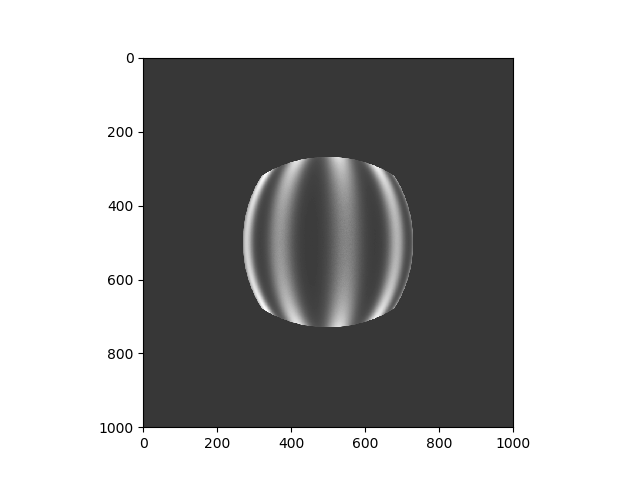

In [50]:
plt.figure()
plt.imshow(OMR_snell_stochastic2,cmap='gray')

# Go backwards

In [5]:
check_air = tifffile.imread('examples/example_check_inwindow_dsm.tif')

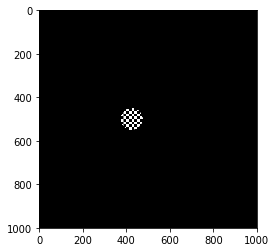

In [6]:
plt.figure()
plt.imshow(check_air/25,cmap='gray')

In [7]:
%time inverse = display_stochastic.inverse_transform_image_loop(check_air,low_steps=0,high_steps=16)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


inverting image...
1/5 ...
2/5 ...
3/5 ...
4/5 ...
5/5 ...
Done.
Calculating reconstruction error...
mean absolute error (proportion of target):0.28830660059246466
CPU times: user 20.7 s, sys: 5.97 s, total: 26.7 s
Wall time: 26.6 s


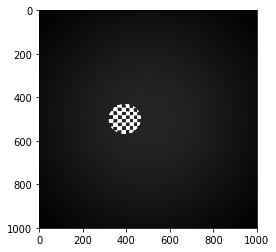

In [8]:
plt.figure()
plt.imshow(inverse,cmap='gray')

In [9]:
forward = display_stochastic.transform_images_loop(inverse,low_steps=0,high_steps=16,scale=False,surround=False)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


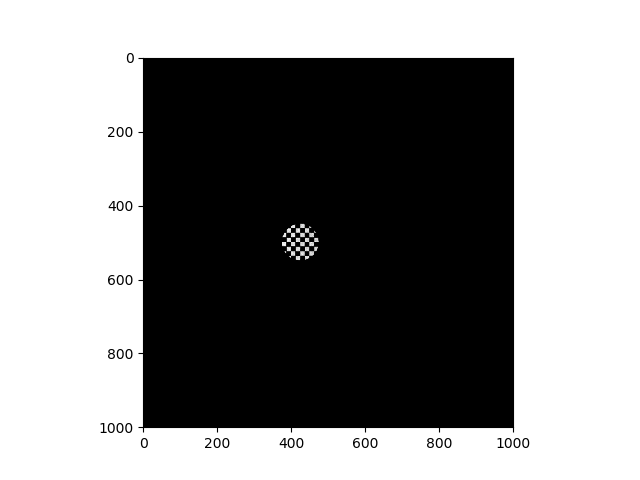

In [12]:
plt.figure()
plt.imshow(forward,cmap='gray')

In [13]:
high_steps=16
low_steps=0
target = (check_air-np.min(check_air))/(np.max(check_air)-np.min(check_air))*(high_steps-low_steps) + low_steps

<IPython.core.display.Javascript object>


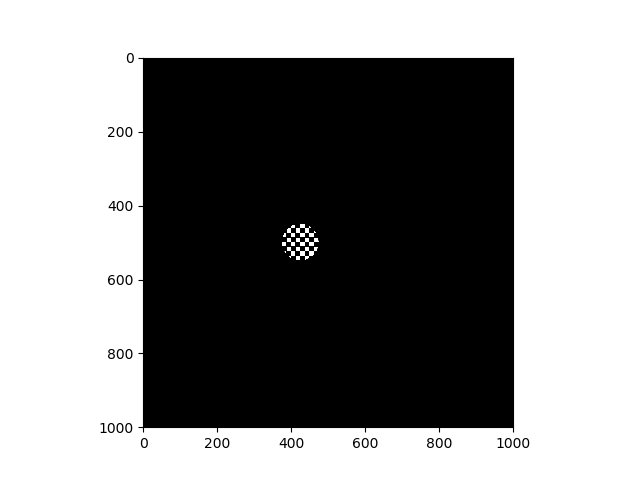

In [14]:
plt.figure()
plt.imshow(np.exp(target),cmap='gray')

In [20]:
np.max(np.exp(target))

8886110.520507872

In [15]:
def norm_im(im):
    return (im-np.min(im))/(np.max(im)-np.min(im))

In [62]:
(10000-9900)/5/10000

0.002

In [63]:
1/(100*5)

0.002

In [88]:
test_target = np.zeros((1000,1000))
test_prediction = np.zeros_like(test_target)

test_target[500,500] = 10000
test_prediction[500,500] = 9900

np.mean(np.abs(test_target-test_prediction))/100

1e-06

In [91]:
1- np.mean((test_target-test_prediction)**2)/np.var(test_target)

0.8591596325525224

In [86]:
np.max(test_target)

1.0

In [90]:
test_target = forward
test_prediction = np.exp(target)

In [78]:
w = np.abs((test_target-test_prediction)/((test_target+test_prediction)/2))

In [73]:
w[np.isnan(w)] = 0

In [79]:
np.nanmean(w)

1.6644710132106488

In [52]:
(np.mean(np.abs(forward-np.exp(target))))/(np.max(np.exp(target))-np.min(np.exp(target)))
#(np.sum(np.abs(forward-np.exp(target))))/(np.sum(np.exp(target)))

0.0010249415137708897

In [27]:
np.mean(np.abs(norm_im(forward[350:650,350:650])-norm_im(target[350:650,350:650])))/np.mean(norm_im(target[350:650,350:650]))

0.2798264587285067

In [17]:
np.mean(np.abs(norm_im(forward)-norm_im(target)))

0.001092979024690794

In [ ]:
np.m

<IPython.core.display.Javascript object>


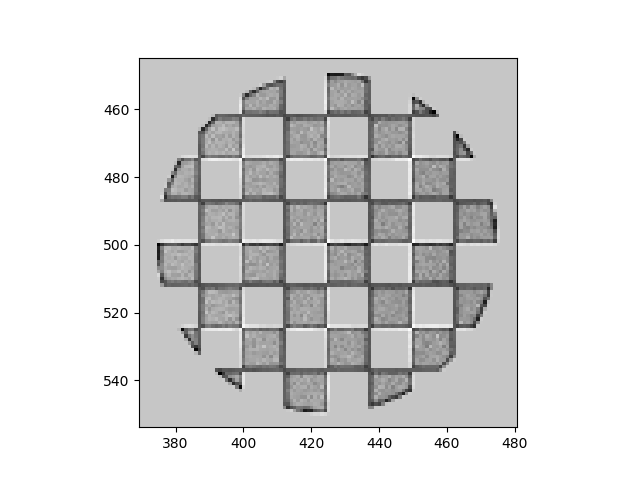

In [16]:
plt.figure()
plt.imshow(norm_im(forward)-norm_im(target),cmap='gray')

### Code below is under development, please ignore

In [21]:
def save_inverses(inv,hf_file):
    for i in range(len(inv)):
        hf_file.create_dataset('inverse_{}'.format(i),data=str(display_stochastic.inverses[i]))

In [14]:
def read_inverses(fn):
    inverses = []
    hf = h5py.File(fn,'r')
    for key in hf.keys():
        inverses.append(ast.literal_eval(str(np.array(hf[key]))))
    hf.close()
    return inverses